In [42]:
import pandas as pd
import numpy as np
import aquire

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [3]:
df = aquire.get_store_data()

In [4]:
df = aquire.feature_engineering()

## Splitting Data
- Human Split

In [6]:
df = df.drop(columns='key_0')

In [10]:
df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2017-12-31 00:00:00+0000', tz='UTC'))

In [13]:
train = df.loc[:'2015']
validate = df.loc['2016']
test = df.loc['2017']

<AxesSubplot:xlabel='sale_date'>

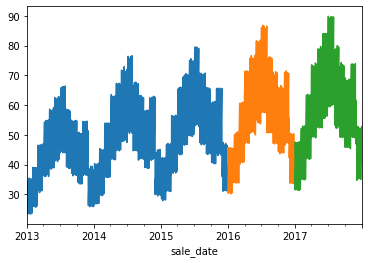

In [21]:
train.resample('D').sale_amount.mean().plot()
validate.resample('D').sale_amount.mean().plot()
test.resample('D').sale_amount.mean().plot()

In [23]:
y = train.resample('D').sale_amount.mean()

In [24]:
#basic stats of train

In [26]:
y.describe()

count    1095.000000
mean       48.609337
std        11.470503
min        23.418000
25%        39.578000
50%        48.606000
75%        56.281000
max        79.588000
Name: sale_amount, dtype: float64

Text(0, 0.5, 'Diffrence after each day')

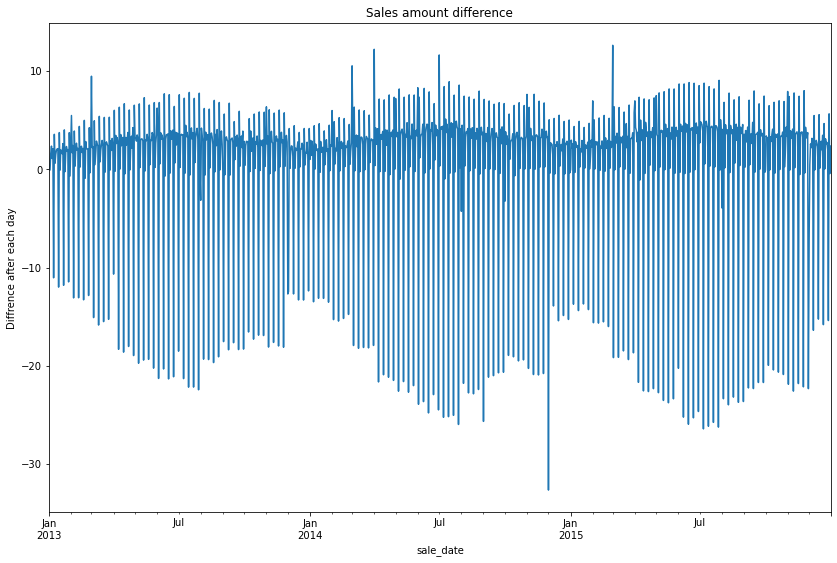

In [33]:
plt.figure(figsize = (14,9))
y.diff().plot()
plt.title('Sales amount difference')
plt.ylabel('Diffrence after each day')

#### Weekly sales

<AxesSubplot:xlabel='sale_date'>

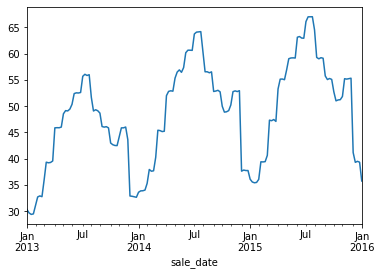

In [35]:
train.resample('W').sale_amount.mean().plot()

#### Monthly Sales 

<AxesSubplot:xlabel='sale_date'>

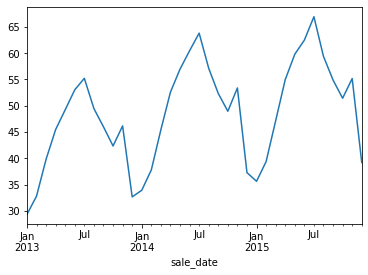

In [36]:
train.resample('M').sale_amount.mean().plot()

Text(0, 0.5, 'Diffrence after each day')

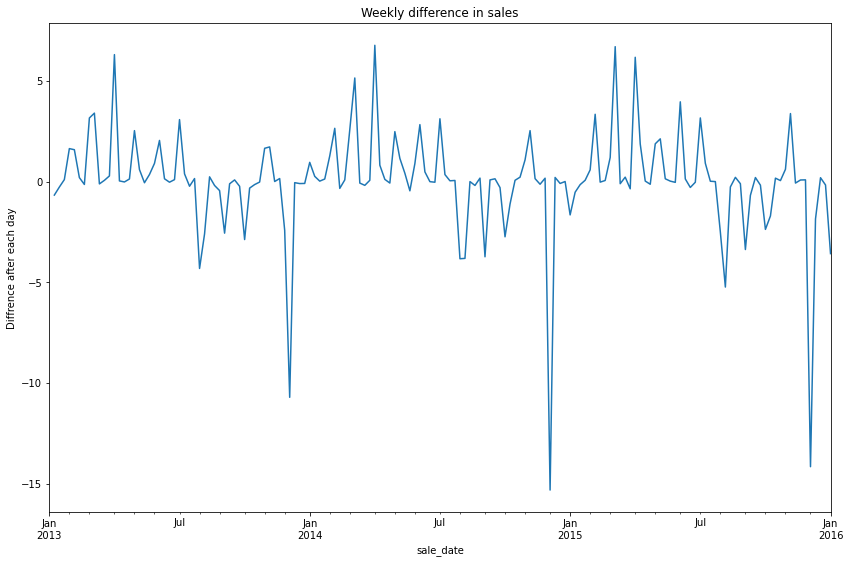

In [40]:
#weekly change in sales 
plt.figure(figsize = (14,9))
train.resample('W').sale_amount.mean().diff().plot()
plt.title('Weekly difference in sales')
plt.ylabel('Diffrence after each day')

Text(0, 0.5, 'Diffrence after each day')

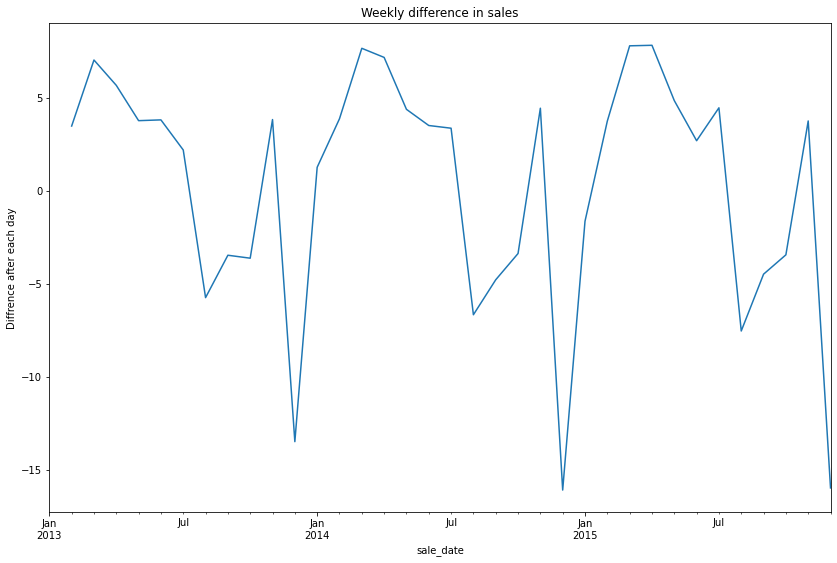

In [41]:
#monthly change in sales 
plt.figure(figsize = (14,9))
train.resample('M').sale_amount.mean().diff().plot()
plt.title('Weekly difference in sales')
plt.ylabel('Diffrence after each day')

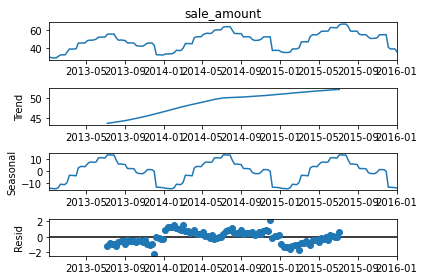

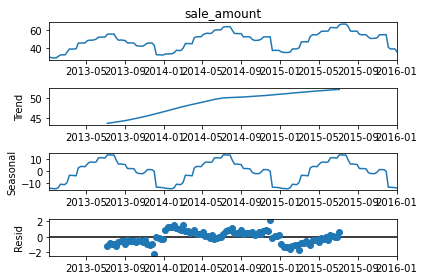

In [44]:
#use sm for weekly and monthly

sm.tsa.seasonal_decompose(y.resample('W').mean()).plot()

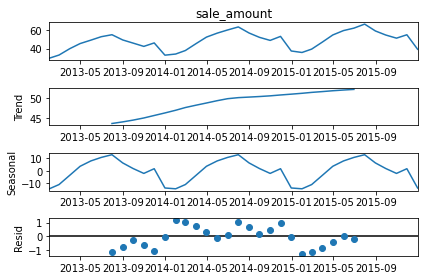

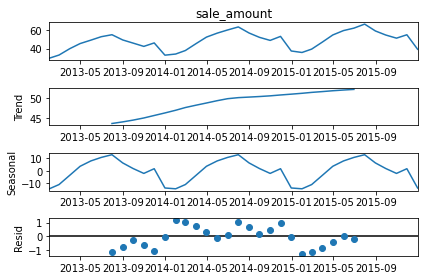

In [45]:

sm.tsa.seasonal_decompose(y.resample('M').mean()).plot()